# Vanilla AutoEncoder
* 이상 라벨 없이 reconstruction error에 기반해서 탐지

In [20]:
import pandas as pd
import numpy as np

SEED = 42
np.random.seed(SEED)
data = pd.read_csv("data/creditcard.csv")

In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
X_data = data.drop("Class", axis=1)
y_data = data["Class"]

#X_data.drop("Time", axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, stratify=y_data)

scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

zero_index = np.where(y_train==0)
X_train = X_train[zero_index]

print(X_train.shape)
print(X_valid.shape)

(213236, 30)
(71202, 30)


In [23]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input = Input(shape=(30, ))
hidden = Dense(15, activation="relu")(input)
output = Dense(30, activation="linear")(hidden)

model = Model(inputs = input, outputs=output)
model.compile(loss="MSE", optimizer="Adam", metrics=["mse"])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                480       
Total params: 945
Trainable params: 945
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, X_train,
          epochs=50,
          batch_size=32,
          verbose=1)

Epoch 1/50
6664/6664 [==============================] - 20s 3ms/step - loss: 0.0048 - mse: 0.0048
Epoch 2/50
6664/6664 [==============================] - 20s 3ms/step - loss: 7.2517e-04 - mse: 7.2517e-04
Epoch 3/50
6664/6664 [==============================] - 19s 3ms/step - loss: 6.4475e-04 - mse: 6.4475e-04
Epoch 4/50
6664/6664 [==============================] - 19s 3ms/step - loss: 6.0784e-04 - mse: 6.0784e-04
Epoch 5/50
6664/6664 [==============================] - 19s 3ms/step - loss: 5.0105e-04 - mse: 5.0105e-04
Epoch 6/50
6664/6664 [==============================] - 19s 3ms/step - loss: 4.4979e-04 - mse: 4.4979e-04
Epoch 7/50
6664/6664 [==============================] - 19s 3ms/step - loss: 4.4509e-04 - mse: 4.4509e-04
Epoch 8/50
6664/6664 [==============================] - 19s 3ms/step - loss: 4.4303e-04 - mse: 4.4303e-04
Epoch 9/50
6664/6664 [==============================] - 19s 3ms/step - loss: 4.4208e-04 - mse: 4.4208e-04
Epoch 10/50
6664/6664 [==============================]

In [25]:
pred = model.predict(X_valid)
pred.shape

(71202, 30)

In [26]:
from sklearn.covariance import EmpiricalCovariance

# 공분산행렬 계산
emp_cov = EmpiricalCovariance().fit(pred)

# 마할라노비스 거리
outlier_score = emp_cov.mahalanobis(X_valid)
outlier_score = pd.Series(outlier_score)

print(outlier_score.describe())
print(outlier_score.head())

count    7.120200e+04
mean     5.087525e+12
std      2.032243e+13
min      1.410600e+05
25%      3.747116e+11
50%      1.658349e+12
75%      5.068743e+12
max      1.124496e+15
dtype: float64
0    6.638324e+12
1    1.624131e+11
2    1.315858e+10
3    5.053166e+12
4    3.506914e+12
dtype: float64


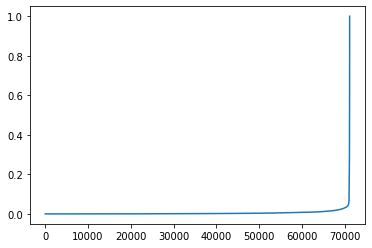

In [27]:
outlier_score_np = outlier_score.to_numpy()
outlier_score_np = np.sort(outlier_score_np)
outlier_score_np = MinMaxScaler().fit_transform(outlier_score_np.reshape(-1, 1))
import matplotlib.pyplot as plt

plt.plot(outlier_score_np)
plt.show()

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

outlier_score_np = outlier_score.to_numpy()
outlier_score_np = MinMaxScaler().fit_transform(outlier_score_np.reshape(-1, 1))
# print(outlier_score_np)
# plt.plot(outlier_score_np)
# plt.show()

threshold = 0.8
pred_label = [1 if i > threshold else 0 for i in outlier_score_np ]


print("accuracy :", accuracy_score(y_true=y_valid, y_pred=pred_label))  # imbalance data이기 때문에 별 의미 없음
print("precision :", precision_score(y_true=y_valid, y_pred=pred_label))  # anomaly detection에선 정밀도가 더 중요!
print("recall :", recall_score(y_true=y_valid, y_pred=pred_label))
print("f1 :", f1_score(y_true=y_valid, y_pred=pred_label))

accuracy : 0.9984410550265442
precision : 1.0
recall : 0.0975609756097561
f1 : 0.17777777777777776


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

outlier_score_np = outlier_score.to_numpy()
outlier_score_np = MinMaxScaler().fit_transform(outlier_score_np.reshape(-1, 1))
# print(outlier_score_np)
# plt.plot(outlier_score_np)
# plt.show()

maxvalue = 0
maxindex = 0
for t in range(100):

    threshold = t / 100.
    pred_label = [1 if i > threshold else 0 for i in outlier_score_np ]


    # print("accuracy :", accuracy_score(y_true=y_valid, y_pred=pred_label))  # imbalance data이기 때문에 별 의미 없음
    # print("precision :", precision_score(y_true=y_valid, y_pred=pred_label))  # anomaly detection에선 정밀도가 더 중요!
    # print("recall :", recall_score(y_true=y_valid, y_pred=pred_label))
    # print("f1 :", f1_score(y_true=y_valid, y_pred=pred_label))

    if f1_score(y_true=y_valid, y_pred=pred_label) > maxvalue:
        maxvalue = f1_score(y_true=y_valid, y_pred=pred_label)
        maxindex = t

print(maxvalue)
print(maxindex)

0.5843621399176955
8
